<div style="text-align: right"> <b>Last Updated:</b> 9JUNE2020 </div>

# Classification with LDA and KNN

__Authors:__ Dale Bowman, PhD; Natasha A Sahr, PhD

The classification problem involves the training of a _classifier_ to determine to which of several groups a new observation vector should be assigned.
There are many different types of classifiers can be trained.

The difference between classification and clustering is simple.
In clustering, the grouping in the dataset is unknown or latent and we are searching for these unknown patterns in the data.
In classification, we have a dataset where the grouping is known and want to use that information to build a tool to classify a new object whose group is unknown. 

Clustering is an _unsupervised_ method since the correct classes are unknown.
Classification is a _supervised_ method since the classes are known. 

We will look at two commonly used classifiers: __linear discriminant analysis__ (LDA) and $\mathbf{k}$__-nearest neighbors__ (KNN).

## Linear Discriminant Analysis

Suppose we have response variable $Y$ which can belong to one of $C$ different categories (classes).
Associated with $Y$ is a set of features, $\mathbf{X}$. For each of the $C$ categories there is associated a __prior probability__ of belonging to that class, denoted $\pi_i$ for$i=1,\dots,C$.
If no information is known about the class probabilities, we can set $\pi_1=\pi_2=\cdots=\pi_C$.
For each category of $Y$, there is an associated _density function_, $f_i(\mathbf{x}) = P(\mathbf{X} = \mathbf{x}| Y=i)$.
That is $f_i(\mathbf{x})$ is the probability that $Y$ is in category $i$ given the observed $\mathbf{X}$.
The probability $f_i(\mathbf{x})$ will be relatively high if $Y$ is in class $i$ and relatively low if $Y$ is in another category.

To find the probability that $Y$ is in class $k$ given the value of observed vector $\mathbf{X}$ we use _Bayes Theorem_ which states that 

$$Pr(Y=k|\mathbf{X}= \mathbf{x}) = \frac{\pi_k f_k(\mathbf{x})}{\sum_{i=1}^C \pi_i f_i(\mathbf{x})}.$$

We assign $Y$ to the class with the highest probability.
The probability $Pr(Y=k|\mathbf{X}= \mathbf{x})$ is called a __posterior probability__.
In general, we won’t know the value of the prior probabilities, $\pi_i$’s, or the form of the density functions, $f_i(\mathbf{x})$.

### When $p=1$

The LDA classifier can be illustrated when there is only one feature ($p=1$).
For this case, LDA assumes a _normal_ (or Gaussian) distribution for $f_i(\mathbf{x})$.
The general equation for the normal density is 

$$f_i(x) = \frac{1}{\sqrt{2 \pi \sigma_i^2}} \exp \left( \frac{1}{2 \sigma_i^2} (x-\mu_i)^2 \right).$$

In the normal distribution, $\mu_i$ is the __mean__ (measuring central tendency) and $\sigma_i^2$ is the __variance__ (measuring dispersion).
It is symmetric about the mean.

The LDA classifier makes a further assumption that the variances are equal across categories, i.e. $\sigma_1^2=\sigma_2^2=\cdots=\sigma_C^2=\sigma^2$.
If this assumption is not reasonable, a _quadratic discriminant analysis_ can be used.
Using the normal model the posterior probability becomes, 

$$P(Y=k|X=x) = \frac{ \pi_k \exp \left(\frac{1}{2\sigma^2} (x-\mu_k)^2\right)}{\sum_{i=1}^C \pi_i \exp \left(\frac{1}{2\sigma^2} (x-\mu_i)^2\right)}$$

A new observation with feature value $x_0$ is classified into the category for which this probability is the biggest.
If we take the log of this equation and drop some common terms, this is equivalent to choosing to assign $x_0$ to the category for which $\delta_k$ is largest, for 

$$\delta_k(x) = x_0 \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + \log(\pi_k).$$

We can illustrate the LDA classifier for the case where $K=2$ and $\pi_1=\pi_2=0.5$ in Figure 1 below. The <font color="red"> red line is a normal distribution with $\mu = - 1.25$ and $\sigma^2 = 1$</font> and the <font color="blue"> blue line is a normal distribution with $\mu = 1.25$ and  $\sigma^2 = 1$</font>. The black line ($x = 0$) shows the _decision boundary_ found using the LDA classifier. The response, $Y$, will be classified into: 
- <font color="red"> the red group for values of $X < 0$</font>; and,
- <font color="blue"> blue group for values of $X > 0$</font>.

<!-- __Figure 1__ -->

<!-- <body>
    <div class="img-box">
        <img src="images/lda-1.jpg" alt="img1" style="width:100%" />
    </div>
</body> -->
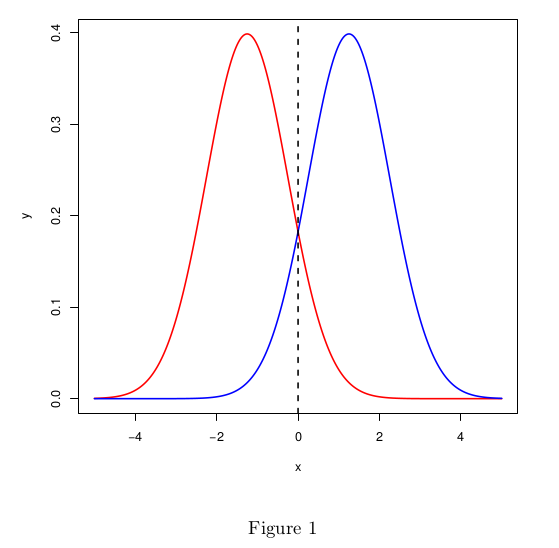

Of course, in practice we don’t know the population mean or variance of the $C$ classes, so we estimate these parameters from the training data.
We use the sample means within each category to estimate the $\mu_i$’s and the sample variance $S^2$ using all the data to estimate the common variance $\sigma^2$.
We can estimate the prior probabilities using the proportions of responses in each category in our training data.
For example, if we have 20 observations in category 1 and a total of 100 observations, we would estimate $\pi_1$ as $\frac{20}{100} = 0.2$.

For the case where $p>2$, the LDA is constructed similarly using a multivariate normal distribution.
This distribution assumes that each of the $p$ features in the observation vector, $X$, has a normal distribution and it takes into account any linear relationships between the features using the correlation between them.

### LDA Programming Example

We have previously used the `iris.csv` dataset. The `iris.csv` dataset contains 5 variables:

- `SepalLength`: the sepal length (cm)
- `SepalWidth`: the sepal width (cm)
- `PetalLength`: the petal length (cm)
- `PetalWidth`: the petal width (cm)
- `Species`: the flower species (cm)

Let's load it into a dataframe.
First the import:

- `import pandas as pd`

In [1]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/%IFN5#t2uAm}E`8:KV:">pd</variable></variables><block type="importAs" id="_@5-r*j4E`}d?=DXLinf" x="16" y="10"><field name="libraryName">pandas</field><field name="libraryAlias" id="/%IFN5#t2uAm}E`8:KV:">pd</field></block></xml>

Now load the dataframe:

- Create variable `dta_iris`
- Set it to `with pd do read_csv using "datasets/iris.csv"`
- `dta_iris` (to display)

In [2]:
dta_iris = pd.read_csv('datasets/iris.csv')

dta_iris

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="$]iZob4!ow3s#WD~l+*A">dta_iris</variable><variable id="/%IFN5#t2uAm}E`8:KV:">pd</variable></variables><block type="variables_set" id="gM*jw`FfIR3)8=g0iEB7" x="11" y="186"><field name="VAR" id="$]iZob4!ow3s#WD~l+*A">dta_iris</field><value name="VALUE"><block type="varDoMethod" id="ny0sjvqTnn2B]K2za7Li"><field name="VAR" id="/%IFN5#t2uAm}E`8:KV:">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="INPUT"><block type="text" id="dfrpI5b@DHr+DQ:|@vpv"><field name="TEXT">datasets/iris.csv</field></block></value></block></value></block><block type="variables_get" id="dn{+Q#DO%lN;G_tFGJ#B" x="8" y="304"><field name="VAR" id="$]iZob4!ow3s#WD~l+*A">dta_iris</field></block></xml>

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


We need an additional library for LDA called `numpy`, which is a widely-used math library:

- `import numpy as np`

In [3]:
import numpy as np

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Zhzp)s*VL?V@ES3(j:*b">np</variable></variables><block type="importAs" id="6{E|A)Ya_2{hXV^n,QJP" x="16" y="10"><field name="libraryName">numpy</field><field name="libraryAlias" id="Zhzp)s*VL?V@ES3(j:*b">np</field></block></xml>

#### Labeling the data

Remember that when we do classification, we tell the program what the right answer is.
Thinking about it in terms of clusters, in classification, we tell the computer what the clusters are and then it has to learn how to make those clusters.
That's why classification is called supervised learning.

This is the opposite of clustering where we ask the computer to discover the clusters for us. That's why clustering is called unsupervised learning.

To be clear, there are many other kinds of supervised and unsupervised learning that we will talk about in the future.
Classification and clustering are just some examples.

To label the data, we need to tell the program the names of the clusters (more often called categories) that we want.

To do this, we're going to split our dataframe into two pieces:

- Everything but the labels
- The labels by themselves

Let's start with everything but the labels:

- Create variable `X`
- Set it to `dta_iris [ ] ` containing the following in a list
    - `"SepalLength"`
    - `"SepalWidth"`
    - `"PetalLength"`
    - `"PetalWidth"`
- `X` (to display)

**Use `{dictVariable} []` in LISTS**

In [4]:
X = dta_iris[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]

X

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="py,.kr!f9i=.v7I5_d+^">X</variable><variable id="$]iZob4!ow3s#WD~l+*A">dta_iris</variable></variables><block type="variables_set" id="46~F|Y~BiXd|Vok0}p,p" x="33" y="69"><field name="VAR" id="py,.kr!f9i=.v7I5_d+^">X</field><value name="VALUE"><block type="indexer" id="p,##xUo8Nj3`vpMVBjr8"><field name="VAR" id="$]iZob4!ow3s#WD~l+*A">dta_iris</field><value name="INDEX"><block type="lists_create_with" id="a.wA7Xdx%GbQ)t#XDKvV"><mutation items="4"></mutation><value name="ADD0"><block type="text" id="aZG|GLqavO~,RXBOcuJ+"><field name="TEXT">SepalLength</field></block></value><value name="ADD1"><block type="text" id="b/mW9(0w,rS.ny;Y(]5A"><field name="TEXT">SepalWidth</field></block></value><value name="ADD2"><block type="text" id="4yc?!4pnBI1/rSBQ41!t"><field name="TEXT">PetalLength</field></block></value><value name="ADD3"><block type="text" id="2biSAqV~ba^2sL^FlfyH"><field name="TEXT">PetalWidth</field></block></value></block></value></block></value></block><block type="variables_get" id="W]bu*LAe{2;n#?+7WQ-[" x="30" y="219"><field name="VAR" id="py,.kr!f9i=.v7I5_d+^">X</field></block></xml>

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Now do the same thing with `Species` but save in `Y`.
You may wish to copy your blocks above and modify:

- Create variable `Y`
- Set it to `dta_iris [ ] ` containing the following in a list
    - `"Species"`
- `Y` (to display)

In [5]:
Y = dta_iris[['Species']]

Y

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="@83Gxqb{/h|%%9Yr?2q!">Y</variable><variable id="$]iZob4!ow3s#WD~l+*A">dta_iris</variable></variables><block type="variables_set" id="46~F|Y~BiXd|Vok0}p,p" x="33" y="69"><field name="VAR" id="@83Gxqb{/h|%%9Yr?2q!">Y</field><value name="VALUE"><block type="indexer" id="p,##xUo8Nj3`vpMVBjr8"><field name="VAR" id="$]iZob4!ow3s#WD~l+*A">dta_iris</field><value name="INDEX"><block type="lists_create_with" id="a.wA7Xdx%GbQ)t#XDKvV"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="aZG|GLqavO~,RXBOcuJ+"><field name="TEXT">Species</field></block></value></block></value></block></value></block><block type="variables_get" id="W]bu*LAe{2;n#?+7WQ-[" x="30" y="219"><field name="VAR" id="@83Gxqb{/h|%%9Yr?2q!">Y</field></block></xml>

,Species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


Now we're going to introduce a new idea, **train/test data splitting**.
This is a bit like sampling from a dataframe, which we've already done, but instead of sampling just a few rows, we randomize all the rows (like shuffling a deck of cards) and then split the rows into two new dataframes (like splitting a deck of cards).

The reason for this is that we want to keep some of the data from the classifier so that we can test the classifier on data its never seen.
We do this because we are not interested in whether the classifier can memorize the data; we want to see if the classifier can **generalize** to new data.

So next we are going to split our `X` and `Y` into train and test sets. 
That means we'll end up with four data frames: `Xtrain`, `Xtest`, `Ytrain`, `Ytest`.

First, the import for splitting:

- `import sklean.model_selection as model_selection`

In [6]:
import sklearn.model_selection as model_selection

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="uASGz64Zb$AOvQyV4pRj">model_selection</variable></variables><block type="importAs" id="sN1YO5FEzpHyxb31@j,Z" x="16" y="10"><field name="libraryName">sklearn.model_selection</field><field name="libraryAlias" id="uASGz64Zb$AOvQyV4pRj">model_selection</field></block></xml>

Now do the splits:

- Create variable `splits`
- Set it to `with model_selection do train_test_split using` a list containing
    - `X` (the features in an array)
    - `Y` (the labels in an array)
    - freestyle `test_size=0.2` (the proportion of the dataset to include in the test split)
    
<!-- The resulting object will have 4 names: `X_train, X_test, Y_train, Y_test`.  -->

In [7]:
splits = model_selection.train_test_split(X, Y, test_size=0.2)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable><variable id="uASGz64Zb$AOvQyV4pRj">model_selection</variable><variable id="py,.kr!f9i=.v7I5_d+^">X</variable><variable id="@83Gxqb{/h|%%9Yr?2q!">Y</variable></variables><block type="variables_set" id="oTGRJ#{R!U^we@Bl@pkT" x="31" y="224"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field><value name="VALUE"><block type="varDoMethod" id="f?j@ker(a#hJv;Nh)IGX"><field name="VAR" id="uASGz64Zb$AOvQyV4pRj">model_selection</field><field name="MEMBER">train_test_split</field><data>model_selection:train_test_split</data><value name="INPUT"><block type="lists_create_with" id="er6r2]}|nA;1;}VsM5I7"><mutation items="3"></mutation><value name="ADD0"><block type="variables_get" id=".mm}`*H4)i%Eq5z={e-$"><field name="VAR" id="py,.kr!f9i=.v7I5_d+^">X</field></block></value><value name="ADD1"><block type="variables_get" id="I3dOV;CPBf^~E%BvgthZ"><field name="VAR" id="@83Gxqb{/h|%%9Yr?2q!">Y</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="@Hg?ib/!8fH$;f3pWJy2"><field name="CODE">test_size=0.2</field></block></value></block></value></block></value></block></xml>

`splits` is actually a list that contains four dataframes:  `Xtrain`, `Xtest`, `Ytrain`, and `Ytest`.

<!-- NOTE: scaling seems unnecessary: https://stats.stackexchange.com/questions/109071/standardizing-features-when-using-lda-as-a-pre-processing-step

We need to scale the features so `SepalWidth`, `SepalLength`, `PetalLength`, and `PetalWidth` are on the same scale. To do this, we need to from `sklearn.preprocessing` import the `StandardScaler` function. -->

<!-- # from sklearn.preprocessing import StandardScaler -->

<!-- Since `SepalWidth`, `SepalLength`, `PetalLength`, and `PetalWidth` are in `X_train` and `X_test`, we will transform both. 

First, use the function `fit_transform` with the object `X_train` on `StandardScaler()`. Rename the object `X_train1`. 

Next, use the function `fit_transform` with the object `X_test` on `StandardScaler()`. Rename the object `X_test1`.  -->

<!-- X_train1 = StandardScaler().fit_transform(X_train)
X_test1 = StandardScaler().fit_transform(X_test) -->

We're almost ready to run the LDA, but first, we have to import the library:

- `import sklearn.discriminant_analysis as da`

In [8]:
import sklearn.discriminant_analysis as da

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="t#|IDvUc9z_$x]MRbwQb">da</variable></variables><block type="importAs" id=":PRm%S%Z/GaCW^6TfKmk" x="143" y="258"><field name="libraryName">sklearn.discriminant_analysis</field><field name="libraryAlias" id="t#|IDvUc9z_$x]MRbwQb">da</field></block></xml>

The next step is to define the model:

- Create variable `lda_iris`
- Set it to `with da create LinearDiscriminantAnalysis using` a list containing
    - freestyle `n_components=1`
    
The parameter `n_components` refers to the number of linear discriminates we want to retreive.

In [9]:
lda_iris = da.LinearDiscriminantAnalysis(n_components=1)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K7CpTCUg}g[G.]s[(-@c">lda_iris</variable><variable id="t#|IDvUc9z_$x]MRbwQb">da</variable></variables><block type="variables_set" id="YKGK8q}oHC2L?9R.[4t!" x="-58" y="266"><field name="VAR" id="K7CpTCUg}g[G.]s[(-@c">lda_iris</field><value name="VALUE"><block type="varCreateObject" id="}QuzQLcR5iE|*j7`Cf;6"><field name="VAR" id="t#|IDvUc9z_$x]MRbwQb">da</field><field name="MEMBER">LinearDiscriminantAnalysis</field><data>da:LinearDiscriminantAnalysis</data><value name="INPUT"><block type="lists_create_with" id="Yjx!q**Yny(IJC9]60c#"><mutation items="1"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock" id="4JrrM7#xYy=;S5F{s5Dk"><field name="CODE">n_components=1</field></block></value></block></value></block></value></block></xml>

And now we train the model.
Remember that `splits` contains `Xtrain`, `Xtest`, `Ytrain`, and `Ytest`,
so we want the first and third elements (`Xtrain` and `Ytrain`):

<!-- - Create variable `lda_iris_fit` -->
-  `with lda_iris do fit using` a list containing
    - `in list splits get # 1` (in menu LISTS)
    - `with np do ravel using` a list containing
        - `in list splits get # 3` (in menu LISTS)
    
`ravel` is just a conversion function that turns our `Ytrain` dataframe into a list, which is what `fit` wants.

In [18]:
lda_iris.fit(splits[0], np.ravel(splits[2]))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K7CpTCUg}g[G.]s[(-@c">lda_iris</variable><variable id="Zhzp)s*VL?V@ES3(j:*b">np</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="varDoMethod" id="Z)$q-zn.KTC{+^l-wH6u" x="259" y="169"><field name="VAR" id="K7CpTCUg}g[G.]s[(-@c">lda_iris</field><field name="MEMBER">fit</field><data>lda_iris:fit</data><value name="INPUT"><block type="lists_create_with" id="e_B;36VOJ^lH70V=aWY}"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="C#,#1*rEm+]qEx?L1x[L"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="b_Sz{9#d7d=ystO|k?l_"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id=":s{r1~S,,@.CSh#9`$R;"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="varDoMethod" id="zYBlZ,!^P^%Ib5R@Ch.H"><field name="VAR" id="Zhzp)s*VL?V@ES3(j:*b">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="INPUT"><block type="lists_create_with" id="9s({WSn={~Ink.5O+6Cc"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="^)UBt0jM;BnGmWeG7pw*"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="4Vo!*g]qQ=D}XtD2i39/"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="RysCD3.C27sBxztz(T}2"><field name="NUM">3</field></block></value></block></value></block></value></block></value></block></value></block></xml>

LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

Our goal is `classification`, so the final step is to predict classes.
However, instead of using the training data, we will use the test data:

- Create variable `lda_iris_predict`
- Set it to `with lda_iris do predict using` a list containing
    - `in list splits get # 2` 
- `lda_iris_predict` (to display)

In [20]:
lda_iris_predict = lda_iris.predict(splits[1])

lda_iris_predict

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="|:at^Zvntr4oK/2tOxcg">lda_iris_predict</variable><variable id="K7CpTCUg}g[G.]s[(-@c">lda_iris</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="variables_set" id="NHw$/HH988vNLbZgn)CM" x="88" y="212"><field name="VAR" id="|:at^Zvntr4oK/2tOxcg">lda_iris_predict</field><value name="VALUE"><block type="varDoMethod" id="N}3ds6:i%0MtTA:(2im4"><field name="VAR" id="K7CpTCUg}g[G.]s[(-@c">lda_iris</field><field name="MEMBER">predict</field><data>lda_iris:predict</data><value name="INPUT"><block type="lists_create_with" id="3Ru6U*^.a`oD7$bu/I%y"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="@lpyN+:CEcPQ#Q:Svm|9"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="ng))4fZyb@U1|eswo1}:"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="Lo)w=2LL|Tf-L/gkeTdT"><field name="NUM">2</field></block></value></block></value></block></value></block></value></block><block type="variables_get" id="I#4y[,+*#I5s;b;h3o/M" x="75" y="307"><field name="VAR" id="|:at^Zvntr4oK/2tOxcg">lda_iris_predict</field></block></xml>

array(['setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'setosa',
       'setosa', 'virginica', 'setosa', 'versicolor', 'versicolor'],
      dtype='<U10')

Sometimes we the predicted probabilities that an item (row of features) would fall into each class:

- `with lda_iris do predict_proba using` a list containing
    - `in list splits get # 2` 

In [21]:
lda_iris.predict_proba(splits[1])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K7CpTCUg}g[G.]s[(-@c">lda_iris</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="varDoMethod" id="N}3ds6:i%0MtTA:(2im4" x="219" y="404"><field name="VAR" id="K7CpTCUg}g[G.]s[(-@c">lda_iris</field><field name="MEMBER">predict_proba</field><data>lda_iris:predict_proba</data><value name="INPUT"><block type="lists_create_with" id="3Ru6U*^.a`oD7$bu/I%y"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="@lpyN+:CEcPQ#Q:Svm|9"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="ng))4fZyb@U1|eswo1}:"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="Lo)w=2LL|Tf-L/gkeTdT"><field name="NUM">2</field></block></value></block></value></block></value></block></xml>

array([[1.00000000e+00, 1.16995338e-17, 3.72825075e-36],
       [1.99773305e-18, 9.99900579e-01, 9.94213914e-05],
       [5.83082624e-39, 3.90691069e-04, 9.99609309e-01],
       [1.12713186e-15, 9.99990188e-01, 9.81202899e-06],
       [8.88095530e-27, 8.25396506e-01, 1.74603494e-01],
       [5.69162621e-45, 4.90963670e-07, 9.99999509e-01],
       [1.00000000e+00, 1.43300694e-18, 1.58122234e-37],
       [5.66576083e-22, 9.93896500e-01, 6.10350014e-03],
       [4.36492181e-30, 2.03468532e-01, 7.96531468e-01],
       [1.47723721e-16, 9.99976997e-01, 2.30030232e-05],
       [6.84064924e-38, 1.23957216e-04, 9.99876043e-01],
       [4.48186395e-44, 4.30690678e-06, 9.99995693e-01],
       [1.07135362e-19, 9.99841377e-01, 1.58622532e-04],
       [7.09506597e-31, 1.89406306e-02, 9.81059369e-01],
       [2.10065118e-16, 9.99999015e-01, 9.85339693e-07],
       [1.00000000e+00, 5.38800194e-21, 1.71325368e-40],
       [6.47201679e-17, 9.99998725e-01, 1.27546919e-06],
       [2.18020394e-21, 9.98860

Notice that for each prediction (a row) we have three probabilities that sum up to 1, corresponding to the three different species.

We now have performed all steps to train and predict classes with an LDA classifier. 

## $k$-Nearest Neighbor

The $k$-nearest neighbor (KNN) method of classification is also based on the posterior probabilities of the response being in a category given the observed vectors. The difference is in how this probability is estimated. For a given value of $K$ and a new observation vector, $x_0$, first the $K$ observation vectors in the data set that are nearest to $x_0$ are found. Out of this set of $k$ vectors, the posterior probability of class $j$ is found by counting the number of the $K$ nearest neighbors that are in class $j$ divided by $K$. The new observation vector, $x_0$, is then classified into the class with the highest posterior probability.

The choice of $K$ has a great impact on the KNN classifier. When $K$ is low, the classifier tends to be overly flexible, while for $K$ too high the classifier becomes less flexible and will make more mistakes. If we use a part of the data to train the classifier (_training data set_) and then test it on the rest of the data (_test data set_), then for $K$ too low, you will get low error rates on the training set but you may get very high error rates on the test set. This implies the classifier has been _over fit_. On the other hand if $K$ is too high the error rate on the training set will be too low and will not be useful for classification.

### $k$-Nearest Neighbor Programming Example

We will use the same `iris.csv` dataset as in the LDA example. Recall, data has already been pre-processed for use. We have: 

 - the training set: `X_train1` the features, `Y_train` the labels
 - the testing set: `X_test1` the features, `Y_test` the labels
 
To perform the KNN classifier, we need to import `KNeighborsClassifier` from `sklearn.neighbors` as `KNNclass`.

In [67]:
from sklearn.neighbors import KNeighborsClassifier as KNNclass

Use the function `KNNclass` with the argument `n_neighbors=5` and assign the object to `knnclass_iris`. The choice of the number of neighbors will depend on classifier tuning. For now, assume we will use 5 neighbors as it is one of the most commonly used values for the KNN algorithm. 

In [68]:
knnclass_iris = KNNclass(n_neighbors=5)

Fit the KNN algorithm using the function `fit` with arguments `X_train1` and `Y_train` on `knnclass_iris`. Name the object `knnclass_iris_fit`. 

In [70]:
knnclass_iris_fit = knnclass_iris.fit(X_train1, Y_train)

To get the predicted classes from the KNN algorithm, use the function `predict` with argument `X_test1` on `knnclass_iris` and name the resulting array `knnclass_pred_iris_labels`. 

In [72]:
knnclass_pred_iris_labels = knnclass_iris.predict(X_test1)

We now have performed all steps to train and predict classes with an KNN classifier. 

## Assessing the Classifier

### Confusion Matrix

For simplicity, consider a classifier where the response variable has only two classes, say positive (1) and negative (0). A _confusion matrix_ is a tool to evaluate the predictive value of the classifier. The table below is an example of a confusion matrix for a two category classifier.

<!-- __Figure 2__ -->

<!-- <body>
    <div class="img-box">
        <img src="images/confusionMatrixSimple.png" alt="img1" style="width:100%" />
    </div>
</body> -->
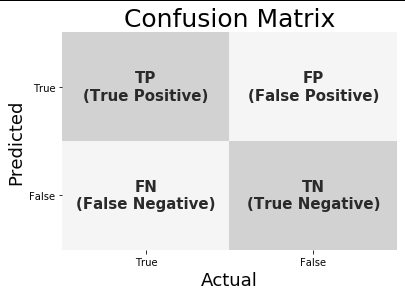

**Figure 2**. __Source:__ https://justmachinelearning.com/2019/09/26/simple-guide-to-the-confusion-matrix/

A prediction is a true positive (TP) if the actual value was positive and the classifier predicted it to be positive. A prediction is a true negative (TN) if the actual value was negative and the classifier predicted it to be negative. TP and TN are correct predictions and should be large for a _good classifier_. 

A prediction is a false positive (FP) if the actual response was negative and the predicted response was positive. A prediction is a false negative (FN) if the actual response was positive and the classifier predicted it to be negative. FP and FN are errors and should be small for a _good classifier_. 

Consider a medical setting for evaluating diagnostic tests. TP is the number of people that have the disease and the test correctly showed that they have the disease. TN is the number of people that don’t have the disease and the test correctly says they don’t. FP is the number of people who do not have the disease but the test incorrectly predicts that they do and FN is the number of people who do have the disease but the test predicts they don’t.

There are some additional measures used to assess the classifier.

The _sensitivity_ also called recall is defined as the ratio of true positive to total number of actual positives, $\frac{TP}{TP+FN}$. The sensitivity will be between 0 and 1. The better the classifier, the larger the sensitivitiy.

The _specificity_ also called precision is a similar measure for the negative response. It is the ratio of true negative to the total number of actual negatives, $\frac{TN}{TN+FP}$. The specificity is also between 0 and 1. The better the classifer, the larger the specificity. 

A measure of the error that is often used is the _false discovery rate_ (FDR). The FDR measures how many of the actual negative responses were predicted as positive by the classifier, $FDR = \frac{FP}{FP+TN} = 1 - \text{specificity}$. The better the classifier, the smaller the FDR. 

It is possible to construct confusion matrices for situations where there are more than two classes but the specificity, sensitivity and FDR are defined differently.

An expanded graphic is in Figure 3. Can you spot the metric missing?

<!-- __Figure 3__ -->

<!-- <body>
    <div class="img-box">
        <img src="images/confusionMatrix.jpg" alt="img1" style="width:100%" />
    </div>
</body> -->
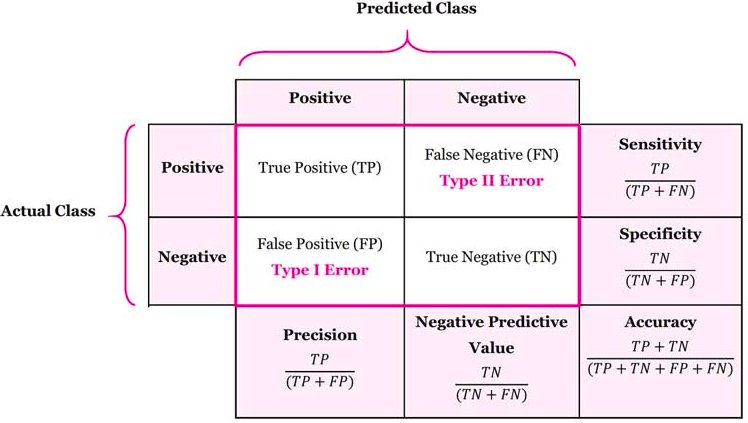

**Figure 3**. __Source:__ https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html

### LDA Programming Example cont.

Remeber our LDA programming example on the `iris.csv` dataset. We now want to evaluate the performance of the classifier for our test dataset. Our observed labels were called `Y_test` and our predicted labels were called `lda_pred_iris_labels`. 

We first need to import `confusion_matrix`, `classification_report`, and `accuracy_score` from `sklearn.metrics`.

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

To get the confusion matrix, use the function `confusion_matrix` with the arguments `Y_test` and `lda_pred_iris_labels`. Name the object `lda_iris_cm`. Print the confusion matrix `lda_iris_cm` using the `print` function.

In [73]:
lda_iris_cm = confusion_matrix(Y_test, lda_pred_iris_labels)
print(lda_iris_cm)

[[11  0  0]
 [ 0  8  2]
 [ 0  0  9]]


To get the accuracy, use the function `accuracy_score` with the arguments `Y_test` and `lda_pred_iris_labels`. Name the object `lda_iris_acc`. Print the confusion matrix `lda_iris_acc` using the `print` function.

In [52]:
lda_iris_acc = accuracy_score(Y_test, lda_pred_iris_labels)
print(lda_iris_acc)

0.9333333333333333


To get the precision and recall for each of the classes, use the function `classification_report` with the arguments `Y_test` and `lda_pred_iris_labels`. Name the object `lda_iris_met`. Print the confusion matrix `lda_iris_met` using the `print` function.

In [57]:
lda_iris_met = classification_report(Y_test, lda_pred_iris_labels)
print(lda_iris_met)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.80      0.89        10
 Iris-virginica       0.82      1.00      0.90         9

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.95      0.93      0.93        30



### $k$-Nearest Neighbor Programming Example cont

We can also evaluate the performance of our KNN classifier. Our observed labels were called `Y_test` and our predicted labels were called `knnclass_pred_iris_labels`. 

Generate the confusion matrix as done previously with the function `confusion_matrix`. Name the confusion matrix for the KNN classifier as `knnclass_iris_cm`. Print the confusion matrix with the `print` function.

In [74]:
knnclass_iris_cm = confusion_matrix(Y_test, knnclass_pred_iris_labels)
print(knnclass_iris_cm)

[[11  0  0]
 [ 0  8  2]
 [ 0  0  9]]


Generate the classification report as done previously with the function `classification_report`. Name the classification report for the KNN classifier as `knnclass_iris_met`. Print the classification report with the `print` function. 

In [75]:
knnclass_iris_met = classification_report(Y_test, knnclass_pred_iris_labels)
print(knnclass_iris_met)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.80      0.89        10
 Iris-virginica       0.82      1.00      0.90         9

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.95      0.93      0.93        30



### ROC Curves

The __ROC curve__ is a graphical tool to examine the errors of a classifier. ROC stands for receiver operating characteristics, a term from communications theory. Figure 4 below shows a typical ROC curve for a classifier.

<!-- __Figure 4__ -->

<!-- <body>
    <div class="img-box">
        <img src="images/ROC-1.jpg" alt="img1" style="width:100%" />
    </div>
</body> -->
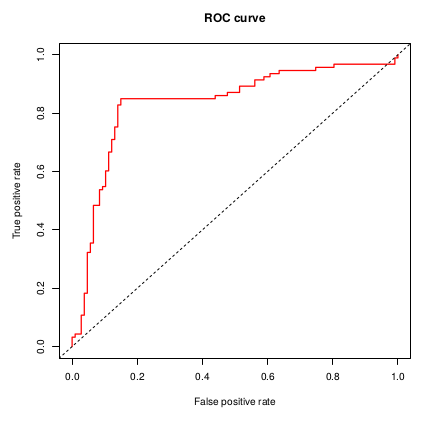

**Figure 4**

The ROC curve has the sensitivity on the vertical axis (y-axis) and 1-specificity (FDR) on the horizontal axis (x-axis). The ideal ROC curve hugs the top left corner which corresponds to a high true positive rate and a low false positive rate. The forty-five degree line that goes from bottom left (0,0) to upper right (1,1) shown as a black dotted line in the plot is considered to be a classifier that is no better than guessing i.e. the posterior probabilities are both 0.5.

A single number summary of the ROC curve is the _AUC_ which stands for area under the (ROC) curve. The larger the AUC the better the classifier has done. The forty-five degree line has an AUC of 0.50 so a good classifier will have AUC higher than random guessing. For the ROC curve in Figure 4 the AUC is 0.8342. This is a moderately good classifier, certainly better than random.

### Complete Example

We are going to work through a complete example using a new dataset. Refer to the previous sections for full instructions if you need assistance. 

 The `binary.csv` dataset contains 4 variables:

- `admit`: the admittance status (0=not admitted, 1=admitted)
- `gre`: the student's GRE score
- `gpa`: the student's GPA
- `rank`: rank of the institution (1=highest to 4=lowest prestige)

Use the function `read_csv` in `pandas` to read in the `binary.csv` dataset and name it `dta_admit`. 

__Note__: The variable names are found in the file and the file does not have an index.

Print the first 5 observations to familiarize yourself with the data.

In [81]:
dta_admit = pd.read_csv("datasets/binary.csv")
dta_admit.head(5)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


We need to process the data. First thing it to split the data into features and labels. The labels are in the first column, named `admit`. The features are in the other three columns. Create `X` and `Y` objects.

In [82]:
Y = dta_admit.iloc[:, 0].values
X = dta_admit.iloc[:, 1:4].values

Split the data into training and testing data. Obtain four objects: `X_train`, `X_test`, `Y_train`, `Y_test`. 

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Scale the features. Obtain two objects: `X_train1`, `X_test1`.

In [86]:
X_train1 = StandardScaler().fit_transform(X_train)
X_test1 = StandardScaler().fit_transform(X_test)

Perform LDA. There will be three lines of code:
1. Use the `LDA` function. Name the object `lda_admit`. 
2. Use the `fit_transform` function. Name the object `lda_admit_fit`.
3. Use the `predict` function. Name the object `lda_pred_admit_labels`.

In [87]:
lda_admit = LDA(n_components=1)
lda_admit_fit = lda_admit.fit_transform(X_train1, Y_train)
lda_pred_admit_labels = lda_admit.predict(X_test1)

Perform KNN classification. There will be three lines of code:
1. Use the `KNNclass` function. Name the object `knnclass_admit`. 
2. Use the `fit_transform` function. Name the object `knnclass_admit_fit`.
3. Use the `predict` function. Name the object `knnclass_pred_admit_labels`.

In [88]:
knnclass_admit = KNNclass(n_neighbors=5)
knnclass_admit_fit = knnclass_admit.fit(X_train1, Y_train)
knnclass_pred_admit_labels = knnclass_admit.predict(X_test1)

We are now interested in evaluating the ROC and AUC. To do that, import `roc_curve` and `roc_auc_score` from `sklearn.metrics`. 

In [89]:
from sklearn.metrics import roc_curve, roc_auc_score

__FOR LDA__:

Use the `roc_curve` function with the arguments `Y_test` and `lda_pred_admit_labels`. Name the object `fpr_lda, tpr_lda, thresholds_lda`. 

In [91]:
fpr_lda, tpr_lda, thresholds_lda = roc_curve(Y_test, lda_pred_admit_labels)

Use `predict_proba` function on `lda_admit` with argument `X_test1`. Name the object  `lda_pred_admit_proba`. Select the probabilities for the positive outcome only using `[:,1]`.

In [95]:
lda_pred_admit_proba = lda_admit.predict_proba(X_test1)[:,1]

Use the `roc_auc_score` function with the arguments `Y_test` and `lda_pred_admit_proba`. Name the object `auc_lda`. Use the function `print` to show `auc_lda`.

In [97]:
auc_lda = roc_auc_score(Y_test, lda_pred_admit_proba)
print(auc_lda)

0.6991210277214335


The AUC is approximately 0.70 for the LDA performed on this data.

__FOR LDA__:

To get the curve, we plot `fpr_lda` on the x-axis and `tpr_lda` on the y_axis. First, import `plotly.graph_objects` as `go`. 

Use the `roc_curve` function with the arguments `Y_test` and `knnclass_pred_admit_labels`. Name the object `fpr_knnclass, tpr_knnclass, thresholds_knnclass`. 

In [132]:
fpr_knnclass, tpr_knnclass, thresholds_knnclass = roc_curve(Y_test, knnclass_pred_admit_labels)

Use `predict_proba` function on `knnclass_admit` with argument `X_test1`. Name the object  `knnclass_pred_admit_proba`. Select the probabilities for the positive outcome only using `[:,1]`.

In [133]:
knnclass_pred_admit_proba = knnclass_admit.predict_proba(X_test1)[:,1]

Use the `roc_auc_score` function with the arguments `Y_test` and `knnclass_pred_admit_proba`. Name the object `auc_knnclass`. Use the function `print` to show `auc_knnclass`.

In [134]:
auc_knnclass = roc_auc_score(Y_test, knnclass_pred_admit_proba)
print(auc_knnclass)

0.5341446923597025


The AUC is approximately 0.53 for the KNN classification performed on this data.

__ROC Curves__

To get the ROC curves for random guessing, LDA, and KNN classification on one plot, use the code below:

<blockquote><tt>
<pre>import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr_lda, 
                         y=tpr_lda, 
                         name='LDA',
                         line=dict(color='royalblue'))) 
fig.add_trace(go.Scatter(x=fpr_knnclass, 
                         y=tpr_knnclass, 
                         name='KNN classification',
                         line=dict(color='red'))) 
fig.add_trace(go.Scatter(x=[0,1], 
                         y=[0,1], 
                         name='No classifier',
                         line=dict(color='black', 
                                   dash='dash'))) 

fig.update_layout(
    xaxis=dict(title_text="False Positive Rate"),
    yaxis=dict(title_text="True Positive Rate"))
 
fig.show()</pre>
</tt></blockquote>

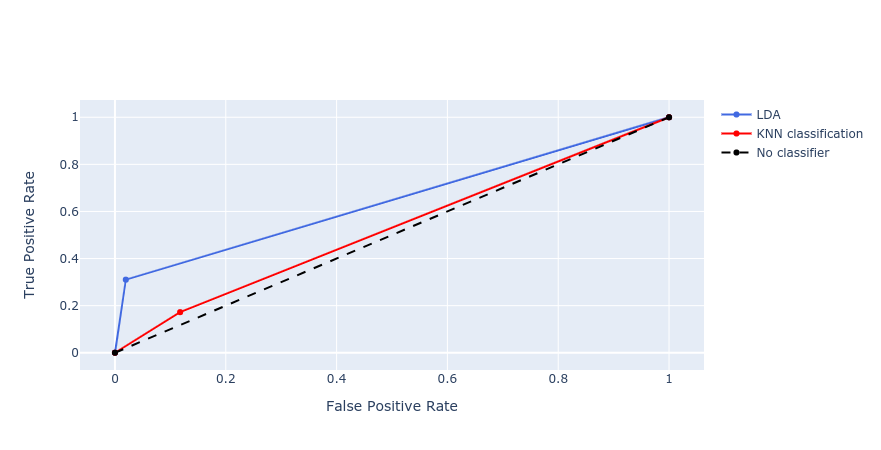

In [136]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr_lda, 
                         y=tpr_lda, 
                         name='LDA',
                         line=dict(color='royalblue'))) 
fig.add_trace(go.Scatter(x=fpr_knnclass, 
                         y=tpr_knnclass, 
                         name='KNN classification',
                         line=dict(color='red'))) 
fig.add_trace(go.Scatter(x=[0,1], 
                         y=[0,1], 
                         name='No classifier',
                         line=dict(color='black', 
                                   dash='dash'))) 

fig.update_layout(
    xaxis=dict(title_text="False Positive Rate"),
    yaxis=dict(title_text="True Positive Rate"))
 
fig.show()